# Laboratory 2.3: Linear Regression

In this practice you will build your own Linear Regression model. As you _should_ remember, we have seen in class how to obtain the optimal values for the parameters in a linear regression model. If you need to refresh your memory, check the slides from theory for the formula for the model optimization.

For the final part of this practice you will also need the following dataset:
- **winequality.csv**: Dataset with several input variables and a continuous output variable to determine wine quality. You can get more information from the [original repository](https://archive.ics.uci.edu/dataset/186/wine+quality).


In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
- Modelling:
    - [scikit-learn](https://scikit-learn.org)
- Plotting:
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)

In [1]:
# Import here whatever you may need
import numpy as np
import sys
import os

# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.insert(0, project_root)

from src.lab_2_3_LinearRegression import LinearRegressor, evaluate_regression, sklearn_comparison, anscombe_quartet

In [2]:
# Define data to use in this practice
x = np.array([0, 3, 2, 1, 4, 6, 7, 8, 9, 10])
y = np.array([2, 3, 2, 4, 5, 7, 9, 9, 10, 13])

In [3]:
### Train your linear regression model
linreg = LinearRegressor()
linreg.fit_simple(x, y)

In [4]:
# Obtain regression performance metrics
y_pred = linreg.predict(x)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.9201359388275275, 'RMSE': 1.0126472956832235, 'MAE': 0.894545454545455}


### Scikit-Learn comparison

In [5]:
### Compare your model with sklearn linear regression model
sklearn_comparison(x, y, linreg)


Custom Model Coefficient: 1.0363636363636364
Custom Model Intercept: 1.2181818181818187
Scikit-Learn Coefficient: 1.0363636363636366
Scikit-Learn Intercept: 1.218181818181817


{'custom_coefficient': 1.0363636363636364,
 'custom_intercept': 1.2181818181818187,
 'sklearn_coefficient': 1.0363636363636366,
 'sklearn_intercept': 1.218181818181817}

### Anscombe's quartet

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

anscombe, datasets, models, result = anscombe_quartet()

Dataset I: Coefficient: 0.5000909090909091, Intercept: 3.0000909090909103
R2: 0.666542459508775, RMSE: 1.1185497916336298, MAE: 0.8374049586776859
Dataset II: Coefficient: 0.49999999999999994, Intercept: 3.000909090909091
R2: 0.6662420337274843, RMSE: 1.1191023557497448, MAE: 0.9679338842975211
Dataset III: Coefficient: 0.49972727272727274, Intercept: 3.0024545454545457
R2: 0.6663240410665592, RMSE: 1.118285693623049, MAE: 0.7159669421487604
Dataset IV: Coefficient: 0.49990909090909097, Intercept: 3.0017272727272726
R2: 0.6667072568984653, RMSE: 1.1177286221293936, MAE: 0.902727272727273


**Questions:** What do you think about the fit? Do you notice something? Comment it here below:


The values of the model and the errors are the same in tevery dataset except the Mean Absolute Error.


Once all models are trained (one for each dataset), we will plot the results of the fit alongside each point set

I
II
III
IV


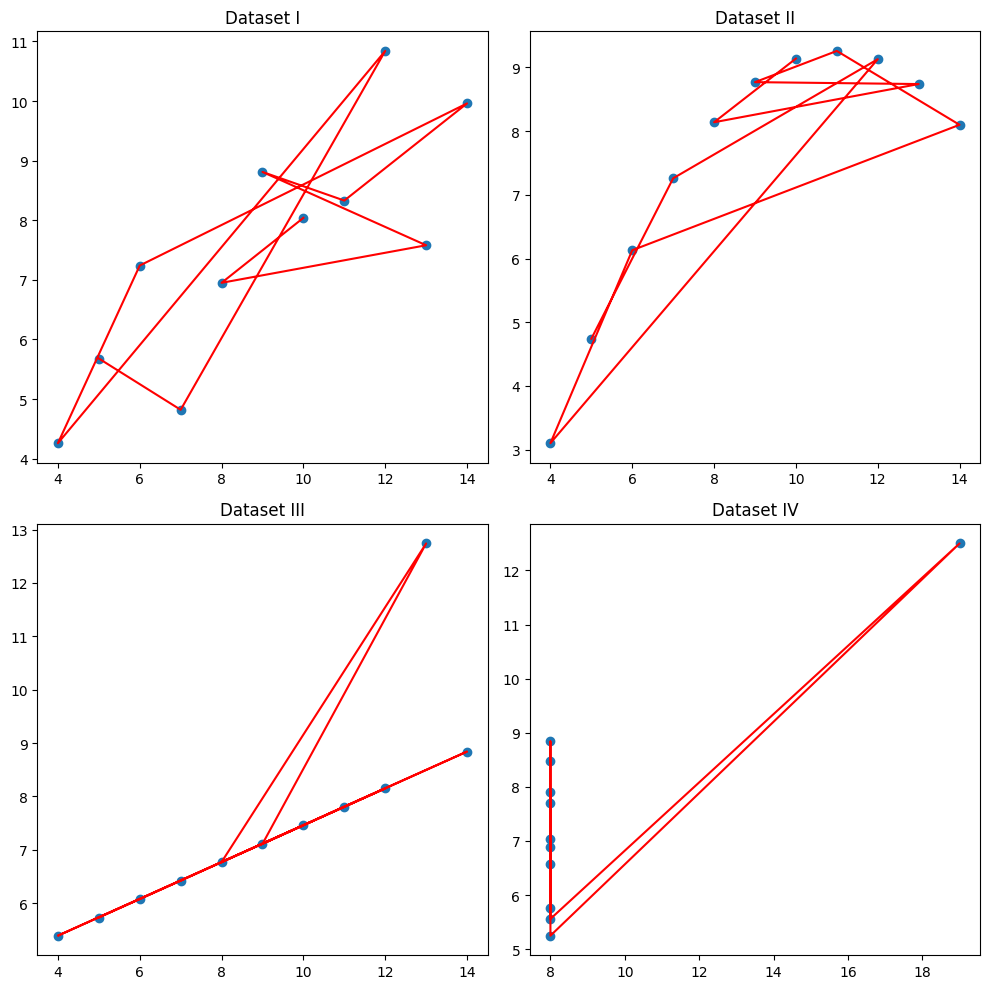

In [29]:
# Visualizing the datasets with their regression lines
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for i, dataset in enumerate(datasets):
    print(dataset)
    filter = anscombe["dataset"] == dataset
    data = anscombe.loc[filter]
    axs[i].scatter(data['x'], data['y'])
    # TODO: Plot the data and the fit (fill the "None" value)
    axs[i].plot(data['x'], data["y"], color='red')  # Regression line
    axs[i].set_title(f"Dataset {dataset}")

plt.tight_layout()
plt.show()


### Multiple variable linear regression

In this section, we are going to use the dataset of the quality of red wines based on chemical measurements. The original dataset can be found in the [UCI Repository](https://archive.ics.uci.edu/dataset/186/wine+quality).

In [30]:
import pandas as pd

wine_data = pd.read_csv("../data/winequality.csv", sep=';')

In [31]:
# Divide dataset between inputs and output
inputs = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
output = 'quality'

X = wine_data[inputs]
y = wine_data[output]

In [32]:
# Train multiple regression model
linreg_multiple = LinearRegressor()
linreg_multiple.fit_multiple(X, y)

In [33]:
# Obtain regression performance metrics
y_pred = linreg_multiple.predict(X)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.3605517030386881, 'RMSE': 0.6455750670692046, 'MAE': 0.5004899634382324}


In [36]:
anscombe = sns.load_dataset("anscombe")
filt = anscombe["dataset"] == "I"
anscombe


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82
